In [2]:
import mysql.connector as sql 

In [45]:
mydb=sql.connect(
    host="127.0.0.1",
    port="3311",
    user="root",
    passwd=""
)
print(mydb)

In [4]:
import pandas as pd
import numpy as np


In [6]:
eduvanz= pd.read_sql_query('Select * FROM eduvanz.lead_details limit 10',mydb)

In [7]:
eduvanz

,lead_id,fk_user_id,fk_financial_applicant_id,application_id,fk_institutes_id,fk_course_id,fk_insitutes_location_id,course_cost,requested_loan_amount,fk_lead_source_id,...,relationship_manager_modified_by,relationship_manager_modified_datetime,is_case_approved_in_sales_bucket,credit_remark,is_lead_whitelisted_by_institute,institute_list_id,institute_list_id_name,dedupe_check,dedupe_check_modified_by,dedupe_check_modified_datetime
0,0,1376,18617,A210707051,NaN,NaN,NaN,0.0,None,74,...,None,None,0,None,0,0,None,0,None,None
1,1,28329,1,A200714001,451.0,2953.0,1.0,500000.0,40000.00,3,...,None,None,0,None,0,0,None,0,None,None
2,2,28325,2,A200714002,1383.0,58023.0,535.0,50000.0,20000,2,...,None,None,0,None,0,0,None,0,None,None
3,3,28329,3,A200714003,451.0,2953.0,1.0,500000.0,500000,3,...,None,None,0,None,0,0,None,0,None,None
4,4,28314,4,A200714004,451.0,2953.0,1.0,500000.0,50000,3,...,None,None,0,None,0,0,None,0,None,None
5,5,28318,5,A200714005,NaN,NaN,NaN,0.0,150000,2,...,None,None,0,None,0,0,None,0,None,None
6,6,28329,6,A200715001,451.0,2953.0,1.0,500000.0,500000,3,...,None,None,0,None,0,0,None,0,None,None
7,7,28329,7,A200715002,242.0,2276.0,104.0,86000.0,15000,5,...,None,None,0,None,0,0,None,0,None,None
8,8,28329,8,A200715003,242.0,2276.0,104.0,86000.0,86000,1,...,None,None,0,None,0,0,None,0,None,None
9,9,28329,9,A200715004,NaN,NaN,NaN,0.0,None,2,...,None,None,0,None,0,0,None,0,None,None


In [8]:
eduvanz= pd.read_sql_query('Select tranch_amount,created_datetime FROM eduvanz.disbursement_tranches_request where created_datetime>="2021-09-01 12:00:00" limit 10',mydb)
eduvanz

,tranch_amount,created_datetime
0,182800.0,2021-09-15 15:04:52
1,222076.0,2021-09-03 16:21:12
2,365600.0,2021-09-09 12:36:52
3,63700.0,2021-09-01 13:00:26
4,13920.0,2021-09-02 14:40:50
5,13920.0,2021-09-02 14:41:01
6,79728.0,2021-09-02 15:02:31
7,46625.0,2021-09-02 15:31:53
8,45000.0,2021-09-03 17:51:07
9,188200.0,2021-09-03 18:23:46


In [5]:
%matplotlib inline

import matplotlib.pyplot as plt 

import seaborn as sns


(array([738034., 738036., 738038., 738040., 738042., 738044., 738046.,
        738048.]), <a list of 8 Text xticklabel objects>)

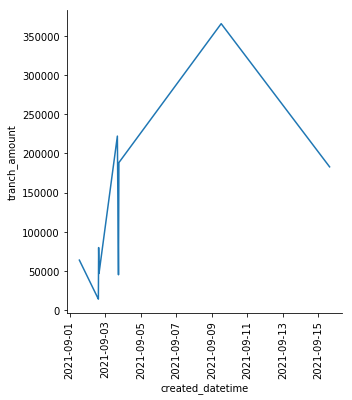

In [11]:
sns.relplot(x="created_datetime", y="tranch_amount", kind="line", data=eduvanz)
plt.xticks(rotation = 90)

In [12]:
bre= pd.read_sql_query('Select count(1) as count, bre_status FROM eduvanz.lead_status where bre_status in(1,2,3) group by bre_status',mydb)
bre

,count,bre_status
0,7503,1
1,269,3
2,4160,2


In [13]:
bins=[0,1,2,3]
group_names = ['Success', 'Fail', 'Experian Error']
bre['bre_status'] = pd.cut(bre['bre_status'], bins, labels=group_names, include_lowest=True )
bre

,count,bre_status
0,7503,Success
1,269,Experian Error
2,4160,Fail


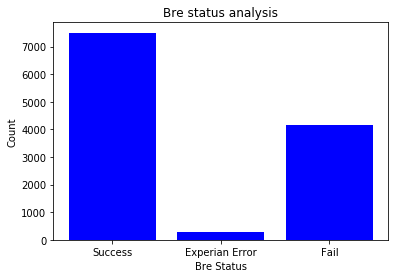

In [15]:
plt.bar("bre_status", "count", data = bre, color = "blue")
plt.xlabel("Bre Status")
plt.ylabel("Count")
plt.title("Bre status analysis")
plt.show()

In [71]:
emi= pd.read_sql_query('select count(*) as count,emi_type from eduvanz.loan where emi_type in(1,2,0) group by emi_type',mydb)

emi

,count,emi_type
0,1425,0
1,611,2
2,1514,1


In [72]:
df = pd.DataFrame(emi)
print (df.dtypes)

count        int64
emi_type    object
dtype: object


In [73]:
df['emi_type'] = df['emi_type'].astype(str).astype(int)
print (df.dtypes)

count       int64
emi_type    int64
dtype: object


In [74]:
df

,count,emi_type
0,1425,0
1,611,2
2,1514,1


In [75]:
for i in range(len(df['emi_type'])):
    print(df['emi_type'][i])
    if(df['emi_type'][i] == 0):
        df['emi_type'][i] = "Arrear"
    elif(df['emi_type'][i] == 1):
        df['emi_type'][i] = "Advance"
    else:
        df['emi_type'][i] = "Downpayment"

0
2
1


/home/samir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/samir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [76]:
df

,count,emi_type
0,1425,Arrear
1,611,Downpayment
2,1514,Advance


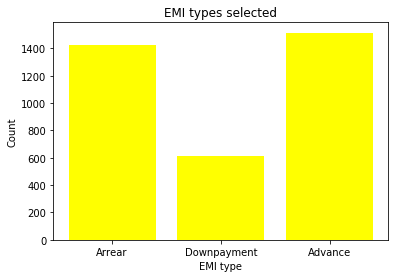

In [78]:
plt.bar("emi_type", "count", data = df, color = "yellow")
plt.xlabel("EMI type")
plt.ylabel("Count")
plt.title("EMI types selected")
plt.show()